\\usi.usilu.net\dfs\utenti\L\lugang\Desktop\pollution_project\random_walk.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


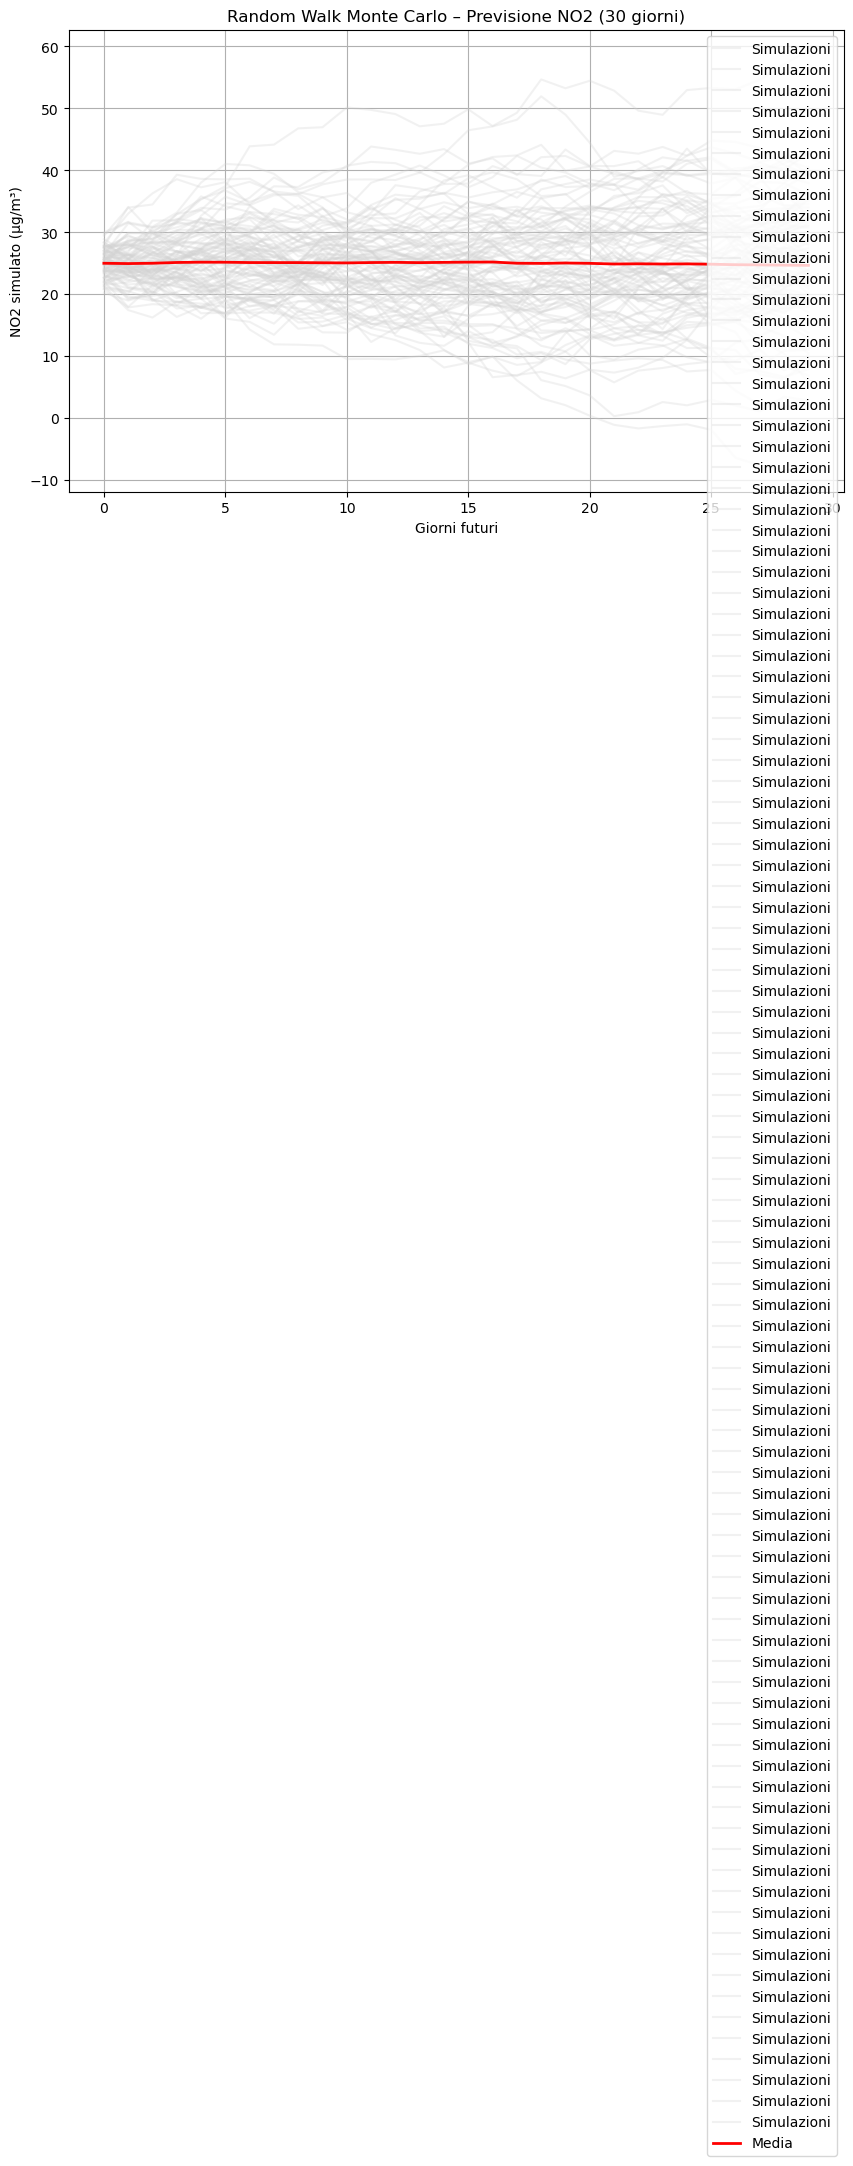

In [2]:
import pandas as pd
from random_walk import simulate_random_walk, plot_random_walk

# === 1. Carica il file NO2 reale ===
df_no2 = pd.read_excel("data/NO2.xlsx")
df_no2["data"] = pd.to_datetime(df_no2["data"], dayfirst=True)
df_no2["NO2_media_2024"] = pd.to_numeric(df_no2["Media (2024)"], errors="coerce")

# === 2. Prendi l'ultimo valore noto come punto di partenza ===
start_val = df_no2["NO2_media_2024"].dropna().iloc[-1]

# === 3. Definisci parametri della Random Walk ===
mu = 0       # drift medio (può essere negativo se ti aspetti calo)
sigma = 2    # deviazione standard giornaliera
n_steps = 30 # giorni futuri
n_sim = 1000 # numero simulazioni

# === 4. Esegui la simulazione ===
simulazioni = simulate_random_walk(start_val, mu=mu, sigma=sigma, n_steps=n_steps, n_sim=n_sim)

# === 5. Plotta ===
plot_random_walk(
    simulazioni,
    title="Random Walk Monte Carlo – Previsione NO2 (30 giorni)",
    ylabel="NO2 simulato (µg/m³)"
)
